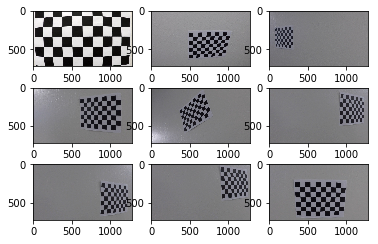

In [66]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = glob.glob('./camera_cal/*.jpg')

for i in range(0, 9):
    plt.subplot(331+i)
    img = mpimg.imread(images[i])
    plt.imshow(img)
    
plt.show()

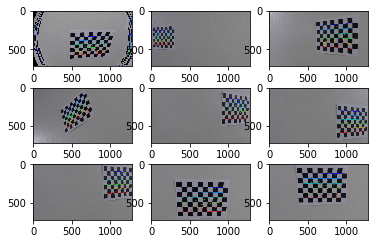

In [85]:
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y
imgPoints = [] #2D points in image plane
objPoints = [] #3D points in real world space

#prepare object points, like (0, 0, 0) (2, 0, 0) ... (8, 5, 0)
objp = np.zeros((nx * ny, 3), np.float32) 
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x, y coordinates

subplot=330
count = 0
for i in images:
    img = mpimg.imread(i)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    #If corners found: 
    if ret == True:        
        #draw corners            
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        imgPoints.append(corners)
        objPoints.append(objp)  
        
        img_size = (img.shape[1], img.shape[0])
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints, img_size, None, None)
        dst = cv2.undistort(img, mtx, dist, None, mtx)
                
        #count=count+1
        #plt.subplot(subplot + count)        
        #plt.imshow(img)
        
        count=count+1
        plt.subplot(subplot + count)        
        plt.imshow(dst)
        
        if count == 9:
            break
plt.show()
    